In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import Utils.showImages as showImg
import Utils.frequencyFilter as freqFilter
import applyFreqFilterShow as af 


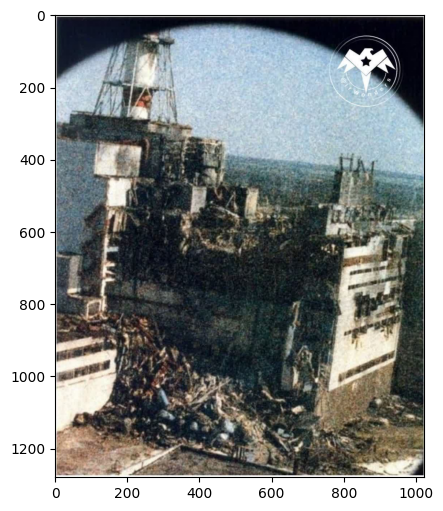

In [2]:
IMAGE_PATH = 'images\\noisy.jpg'
ORIGINAL_IMAGE = cv2.imread(IMAGE_PATH)
ORIGINAL_IMAGE = cv2.cvtColor(ORIGINAL_IMAGE, cv2.COLOR_BGR2RGB)

showImg.show_img_plt(ORIGINAL_IMAGE)


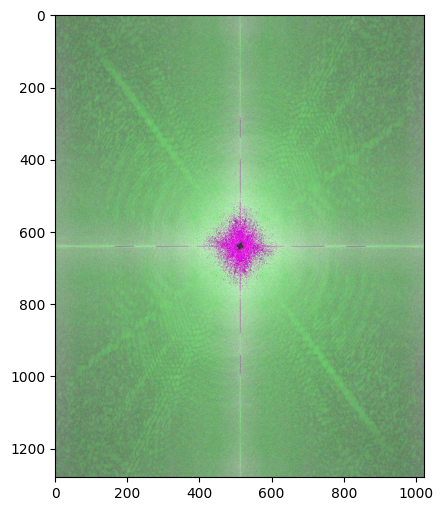

In [3]:
fshift = freqFilter.fftshiftRGB(ORIGINAL_IMAGE)

img_back = 20* np.log(np.abs(fshift)).astype(np.uint8)

showImg.show_img_plt(img_back, vmin = np.min(img_back) , vmax= np.max(img_back))


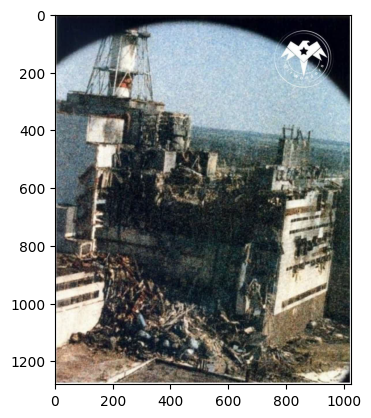

In [4]:

img_backn = freqFilter.ifftshiftBGR(fshift)


# Compute the absolute value of the complex result
img_back = np.abs(img_backn)

# Normalize the result to 0-255
img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)


# Convert back to BGR
img_back = cv2.cvtColor(img_back.astype(np.uint8), cv2.COLOR_RGB2BGR)
plt.imshow(img_back, cmap='gray')


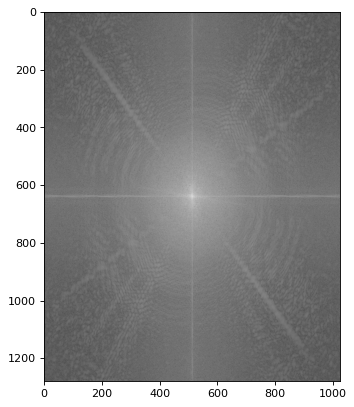

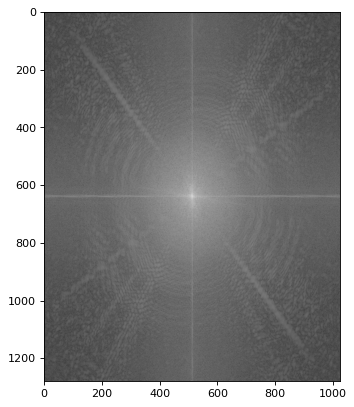

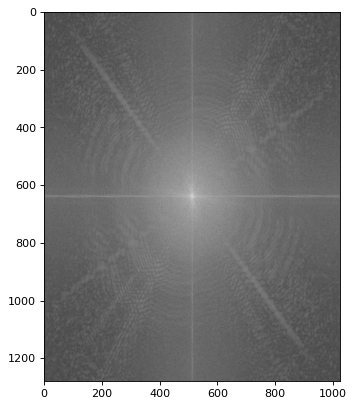

In [5]:
imgB, imgG, imgR = cv2.split(ORIGINAL_IMAGE)


f_imageB = np.fft.fftshift(np.fft.fft2(imgB))
freq_imageB = np.log(abs(f_imageB))

f_imageG = np.fft.fftshift(np.fft.fft2(imgG))
freq_imageG = np.log(abs(f_imageG))

f_imageR = np.fft.fftshift(np.fft.fft2(imgR))
freq_imageR = np.log(abs(f_imageR))


plt.figure(num= 'freq_imageB', figsize=(8, 6), dpi=80)
plt.imshow(freq_imageB, cmap='gray')


plt.figure(num= 'freq_imageG', figsize=(8, 6), dpi=80)
plt.imshow(freq_imageG, cmap='gray')

plt.figure(num= 'freq_imageR', figsize=(8, 6), dpi=80)
plt.imshow(freq_imageR, cmap='gray')


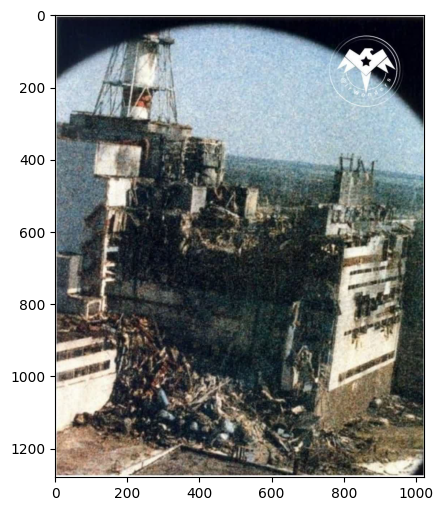

In [6]:
img_back = freqFilter.ifftshift(f_imageB, f_imageG, f_imageR)
showImg.show_img_plt(img_back)

h:\GITHUB\BasicDIP\Utils\frequencyFilter.py:225: ComplexWarning: Casting complex values to real discards the imaginary part
  filtered_image_ft[:,:,ch] = noisy_image_ft[:,:,ch] * wiener_filter_ft


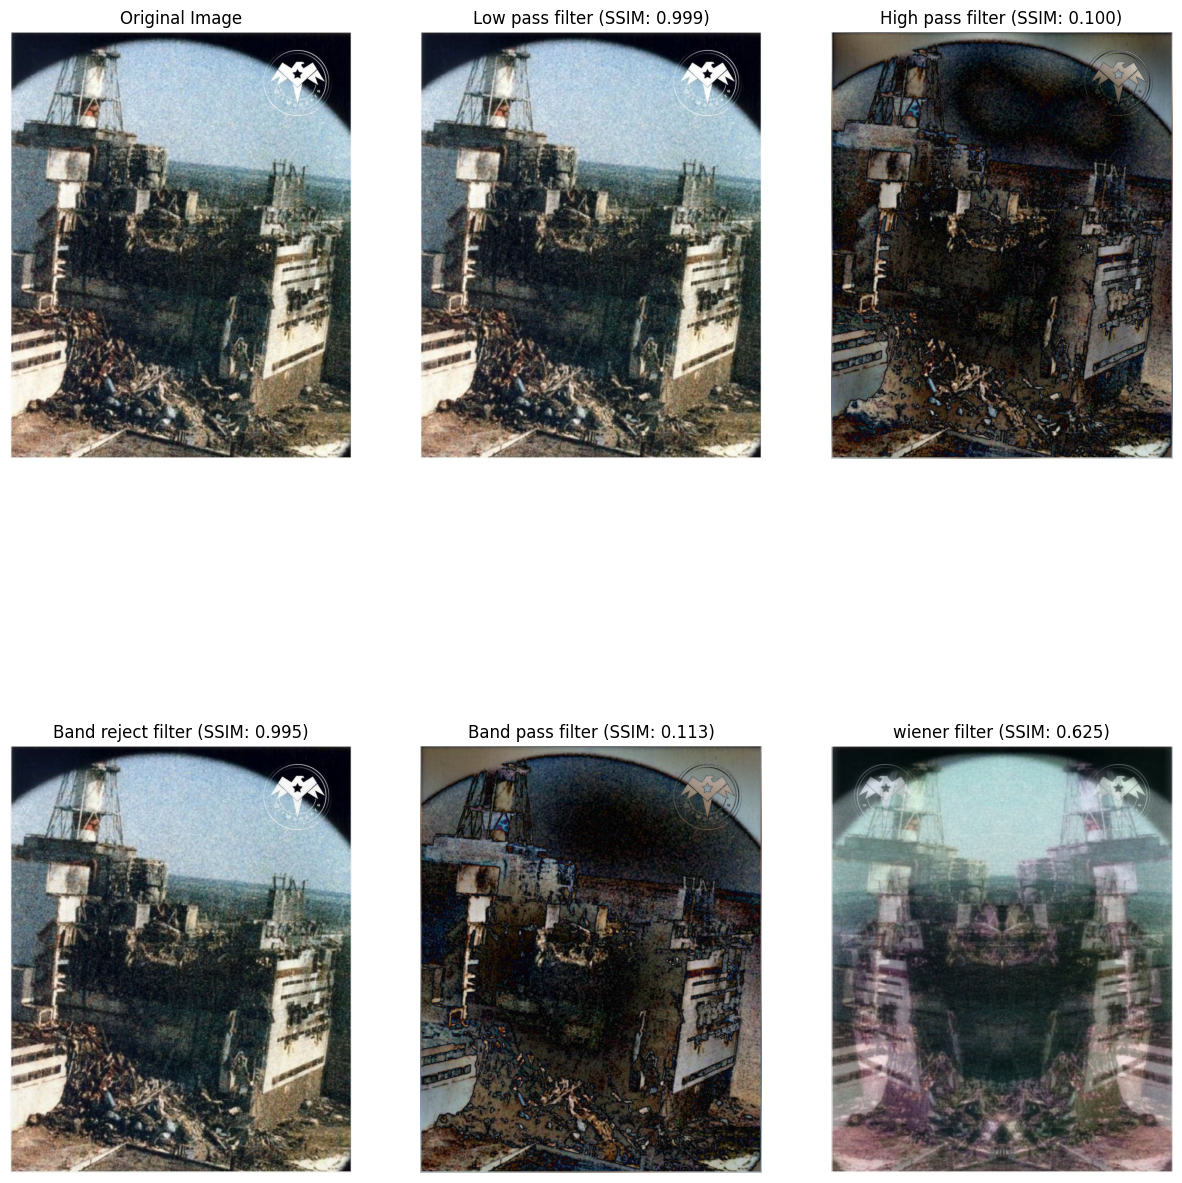

In [7]:
af.applyFreqFilterAndShowImages(ORIGINAL_IMAGE)